In [1]:
%matplotlib inline
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import backend as K
import tensorflow as tf

In [3]:
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
from keras_ex.gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from keras_ex.gkernel.sklearn import (
    RBFClassifier, RBFRegressor,
    make_model_gkernel3,
    make_model_gkernel2,
    make_model_gkernel1,
    make_model_out,
    make_model
)

In [4]:
iris = datasets.load_iris()
X = iris.data.astype(np.float32)
Y = iris.target
N = Y.size
Y2 = keras.utils.to_categorical(Y, num_classes=3)

index = np.arange(N)
xtrain = X[index[index % 2 != 0],:]
ytrain = Y2[index[index % 2 != 0]]
xtest = X[index[index % 2 == 0],:]
yans = Y2[index[index % 2 == 0]]

## make_model_gkernel2
* create kernel layer using GaussianKernel layer
* gamma is trained as weights of NN

In [5]:
lm, model_gkernel = make_model_gkernel2(nn=4, num_lm=15)
print(model_gkernel.inputs[0])
model_gkernel.summary()

W1005 17:04:03.564542 140257247708992 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1005 17:04:03.606508 140257247708992 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1005 17:04:03.617825 140257247708992 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1005 17:04:03.618632 140257247708992 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. P

Tensor("inp:0", shape=(?, 4), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
gkernel (GaussianKernel2)    (None, 15)                1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


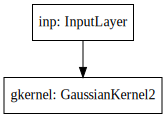

In [6]:
SVG(model_to_dot(model_gkernel).create(prog='dot', format='svg'))

## make_model_gkernel3
* create kernel layer using GaussianKernel layer
* gamma and landmarks are trained as weights of NN

In [7]:
lm, model_gkernel = make_model_gkernel3(nn=4, num_lm=15)
print(model_gkernel.inputs[0])
model_gkernel.summary()

Tensor("inp_1:0", shape=(?, 4), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
gkernel (GaussianKernel3)    (None, 15)                61        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


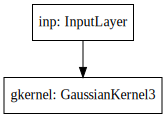

In [8]:
SVG(model_to_dot(model_gkernel).create(prog='dot', format='svg'))

## make_model_out
* Dense layer

In [9]:
model_out = make_model_out(num_lm=15, num_cls=3)
model_out.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 48        
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


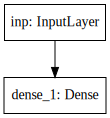

In [10]:
SVG(model_to_dot(model_out).create(prog='dot', format='svg'))

## make_model
* by default, set model_gkernel.trainable=False for warm-up start

In [11]:
model = make_model(
    nn=4, num_cls=3,
    num_lm=15,
    lm=xtrain[np.random.choice(np.arange(xtrain.shape[0]), 15, replace=False)]
)
model.summary()

W1005 17:04:04.146903 140257247708992 deprecation_wrapper.py:119] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 15)                1         
_________________________________________________________________
model_out (Model)            (None, 3)                 48        
Total params: 49
Trainable params: 48
Non-trainable params: 1
_________________________________________________________________


In [12]:
model.get_layer('model_gkernel').trainable

False

In [13]:
model_gkernel = model.get_layer('model_gkernel')
model_gkernel.trainable = True

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inp (InputLayer)             (None, 4)                 0         
_________________________________________________________________
model_gkernel (Model)        (None, 15)                1         
_________________________________________________________________
model_out (Model)            (None, 3)                 48        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


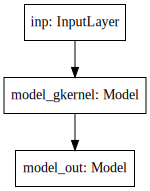

In [15]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [16]:
model.fit(xtrain, ytrain, epochs=50, verbose=0)

W1005 17:04:04.596682 140257247708992 deprecation.py:323] From /home/admin/miniconda3/envs/da02/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
pred = model.predict(xtrain)
pred[:5]

array([[0.8221449 , 0.06321625, 0.11463872],
       [0.8178743 , 0.06717706, 0.11494867],
       [0.79348165, 0.05897074, 0.14754757],
       [0.8443857 , 0.04887389, 0.10674042],
       [0.828861  , 0.05963873, 0.11150029]], dtype=float32)

## custumized function